Load our CSV data into a Panda dataframe

In [50]:
import numpy as np
import pandas as pd

df = pd.read_csv("d:\\tmp\\download\\yourhired.csv")


Show first 10 records

In [7]:
df.head(10)

,Years Experience,Age,Employed?,Previous employers,Level of Education,Hired
0,25,56,N,4,BSc,N
1,0,26,Y,0,BSc,Y
2,28,55,N,6,MSc,N
3,2,30,Y,1,MSc,Y
4,20,49,N,2,PhD,N
5,0,20,Y,0,PhD,Y
6,5,27,Y,2,MSc,Y
7,3,29,Y,1,BSc,Y
8,22,53,Y,5,BSc,N
9,0,19,Y,0,BSc,Y


Show last N lines e.g 3

In [9]:
df.tail(3)

,Years Experience,Age,Employed?,Previous employers,Level of Education,Hired
10,1,21,Y,1,PhD,Y
11,4,26,Y,1,BS,Y
12,0,20,Y,0,PhD,Y


Number of rows,columns

In [5]:
df.shape

(13, 6)

Number of cells

In [8]:
df.size

78

Number of rows

In [10]:
len(df)

13

Number of columns

In [16]:
len(df.columns)

6

In [17]:
df.columns

Index(['Years Experience', 'Age', 'Employed?', 'Previous employers',
       'Level of Education', 'Hired'],
      dtype='object')

Extract individual column values

In [18]:
df['Age']

0     56
1     26
2     55
3     30
4     49
5     20
6     27
7     29
8     53
9     19
10    21
11    26
12    20
Name: Age, dtype: int64

Extract first 5 column values only

In [22]:
df['Age'][:5]

0    56
1    26
2    55
3    30
4    49
Name: Age, dtype: int64

Extract single column value

In [23]:
df['Age'][4]

49

Extract multiple columns

In [26]:
df[['Age','Hired']]

,Age,Hired
0,56,N
1,26,Y
2,55,N
3,30,Y
4,49,N
5,20,Y
6,27,Y
7,29,Y
8,53,N
9,19,Y


Sort by a column or columns

In [29]:
df.sort_values(['Age','Years Experience'])

,Years Experience,Age,Employed?,Previous employers,Level of Education,Hired
9,0,19,Y,0,BSc,Y
5,0,20,Y,0,PhD,Y
12,0,20,Y,0,PhD,Y
10,1,21,Y,1,PhD,Y
1,0,26,Y,0,BSc,Y
11,4,26,Y,1,BS,Y
6,5,27,Y,2,MSc,Y
7,3,29,Y,1,BSc,Y
3,2,30,Y,1,MSc,Y
4,20,49,N,2,PhD,N


get column unique value counts

In [30]:
uniq_eds = df['Level of Education'].value_counts()

In [32]:
uniq_eds

BSc    5
PhD    4
MSc    3
BS     1
Name: Level of Education, dtype: int64

Even plot them!

In [34]:
%matplotlib inline

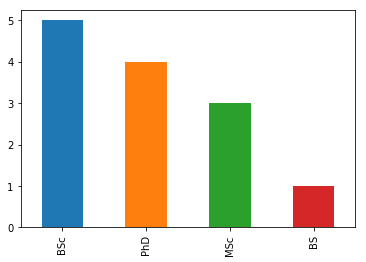

In [35]:
uniq_eds.plot(kind='bar')

In [37]:
from sklearn import tree

We need everything to be numbers for sklearn decision trees
so we have to transforn the Y/N, BSc/PHd etc... into numbers.

In [51]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
d = {'BS': 0, 'MSc': 1, 'PhD': 2,'BSc': 3}
df['Level of Education'] = df['Level of Education'].map(d)
df.head(16)

,Years Experience,Age,Employed?,Previous employers,Level of Education,Hired
0,25,56,0,4,3,0
1,0,26,1,0,3,1
2,28,55,0,6,1,0
3,2,30,1,1,1,1
4,20,49,0,2,2,0
5,0,20,1,0,2,1
6,5,27,1,2,1,1
7,3,29,1,1,3,1
8,22,53,1,5,3,0
9,0,19,1,0,3,1


Now we need to split out the features columns from the predicition column(ie. Hired)

In [52]:
features = list(df.columns[:5])
features

['Years Experience',
 'Age',
 'Employed?',
 'Previous employers',
 'Level of Education']

In [53]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

You can view the actual tree if you have pydotplus installed - pip install pydotplus

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)


In [66]:
#Predict employment of an "older" employed 15-year veteran
jobby = clf.predict([[15, 56, 1, 3, 3]http://localhost:8888/notebooks/Untitled13.ipynb?kernel_name=python3#])
if(jobby[0]==0):
    print ("Your fired!")
else:
    print ("Your hired!")

Your fired!


Awww - too bad

Let's try a "younger" model

In [67]:
jobby = clf.predict([[15, 38, 1, 3, 3]])
if(jobby[0]==0):
    print ("Your fired!")
else:
    print ("Your hired!")

Your hired!


QED